IMPORTING LIBRARIES

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from numpy import loadtxt
from keras.layers import Dense
from keras.models import Sequential

EDA

In [51]:
dataset=pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/updated-Folders/Neural-Network/gas_turbines.csv')
dataset

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [52]:
dataset.shape

(15039, 11)

In [53]:
dataset.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [54]:
dataset.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [55]:
dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15034    False
15035    False
15036    False
15037    False
15038    False
Length: 15039, dtype: bool

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [57]:
dataset['AT']=dataset['AT'].astype('int')
dataset['AP']=dataset['AP'].astype('int')
dataset['AH']=dataset['AH'].astype('int')
dataset['AFDP']=dataset['AFDP'].astype('int')
dataset['TIT']=dataset['TIT'].astype('int')
dataset['TAT']=dataset['TAT'].astype('int')
dataset['TEY']=dataset['TEY'].astype('int')
dataset['CDP']=dataset['CDP'].astype('int')
dataset['CO']=dataset['CO'].astype('int')
dataset['NOX']=dataset['NOX'].astype('int')

In [58]:
dataset.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.411331,-0.549107,-0.047708,-0.049045,0.092171,0.338573,-0.208875,-0.003548,-0.084826,-0.599783
AP,-0.411331,1.000000,0.041356,0.017322,0.078963,0.030594,-0.223789,0.147541,0.097406,0.037935,0.256434
AH,-0.549107,0.041356,1.000000,-0.126796,-0.202722,-0.247273,0.010768,-0.108822,-0.224712,0.162494,0.143453
AFDP,-0.047708,0.017322,-0.126796,1.000000,0.660817,0.560417,-0.495215,0.627973,0.636034,-0.294453,-0.056855
GTEP,-0.049045,0.078963,-0.202722,0.660817,1.000000,0.875109,-0.755447,0.976744,0.965033,-0.504748,-0.208470
TIT,0.092171,0.030594,-0.247273,0.560417,0.875109,1.000000,-0.357658,0.891252,0.863638,-0.683614,-0.231523
TAT,0.338573,-0.223789,0.010768,-0.495215,-0.755447,-0.357658,1.000000,-0.719754,-0.704758,0.062650,0.009096
TEY,-0.208875,0.147541,-0.108822,0.627973,0.976744,0.891252,-0.719754,1.000000,0.939787,-0.537860,-0.101793
CDP,-0.003548,0.097406,-0.224712,0.636034,0.965033,0.863638,-0.704758,0.939787,1.000000,-0.488510,-0.204012
CO,-0.084826,0.037935,0.162494,-0.294453,-0.504748,-0.683614,0.062650,-0.537860,-0.488510,1.000000,0.311738


Visualisations

<Axes: >

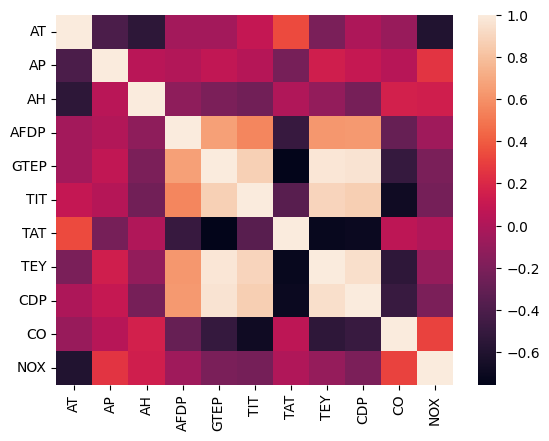

In [59]:
sns.heatmap(dataset.corr())

Splitting Data

In [60]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [61]:
x=dataset.drop(columns='TEY')
y=label_encoder.fit_transform(dataset['TEY'])

In [62]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6,1007,96,3,19.663,1059,550,10,3,82
1,6,1008,97,3,19.728,1059,550,10,3,82
2,6,1008,95,3,19.779,1059,549,10,3,82
3,7,1009,95,3,19.792,1059,549,10,3,82
4,7,1009,95,3,19.765,1059,549,10,3,82
...,...,...,...,...,...,...,...,...,...,...
15034,9,1005,98,3,19.164,1049,546,10,4,79
15035,7,1005,99,3,19.414,1046,543,10,4,79
15036,7,1006,99,3,19.530,1037,537,10,7,90
15037,7,1006,99,3,19.377,1043,541,10,6,93


In [63]:
x.shape

(15039, 10)

In [64]:
y

array([14, 14, 14, ..., 10, 10, 11])

In [65]:
y.shape

(15039,)

In [66]:
model=Sequential()
model.add(Dense(15, input_dim=10, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='linear'))

In [67]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [68]:
model.fit(x,y, validation_split=0.33, epochs=150, batch_size=100)

Epoch 1/150
101/101 [==============================] - 1s 4ms/step - loss: 5992.6377 - mae: 42.4045 - val_loss: 177.5556 - val_mae: 10.3671
Epoch 2/150
101/101 [==============================] - 0s 2ms/step - loss: 189.3120 - mae: 10.3246 - val_loss: 179.1298 - val_mae: 10.3956
Epoch 3/150
101/101 [==============================] - 0s 3ms/step - loss: 185.9445 - mae: 10.2292 - val_loss: 181.9059 - val_mae: 10.4737
Epoch 4/150
101/101 [==============================] - 0s 2ms/step - loss: 181.4059 - mae: 10.0993 - val_loss: 170.0476 - val_mae: 10.1484
Epoch 5/150
101/101 [==============================] - 0s 2ms/step - loss: 176.7436 - mae: 9.9828 - val_loss: 164.0367 - val_mae: 9.9849
Epoch 6/150
101/101 [==============================] - 0s 2ms/step - loss: 170.7732 - mae: 9.8144 - val_loss: 156.7313 - val_mae: 9.7893
Epoch 7/150
101/101 [==============================] - 0s 2ms/step - loss: 164.1267 - mae: 9.6339 - val_loss: 161.9350 - val_mae: 9.9107
Epoch 8/150
101/101 [===========

In [69]:
history = model.fit(x,y,validation_split = 0.33,epochs = 150,batch_size = 100)
scores = model.evaluate(x,y)
print("%s : %2f%%"%(model.metrics_names[1],scores[1]*100))

Epoch 1/150
101/101 [==============================] - 0s 2ms/step - loss: 2.6124 - mae: 1.2628 - val_loss: 2.8009 - val_mae: 1.2995
Epoch 2/150
101/101 [==============================] - 0s 2ms/step - loss: 2.3414 - mae: 1.1830 - val_loss: 2.1182 - val_mae: 1.1644
Epoch 3/150
101/101 [==============================] - 0s 2ms/step - loss: 2.7888 - mae: 1.3070 - val_loss: 2.0302 - val_mae: 1.1210
Epoch 4/150
101/101 [==============================] - 0s 2ms/step - loss: 2.4597 - mae: 1.2204 - val_loss: 2.4511 - val_mae: 1.2698
Epoch 5/150
101/101 [==============================] - 0s 2ms/step - loss: 2.8585 - mae: 1.3347 - val_loss: 2.0852 - val_mae: 1.1519
Epoch 6/150
101/101 [==============================] - 0s 2ms/step - loss: 2.2211 - mae: 1.1540 - val_loss: 2.0190 - val_mae: 1.1204
Epoch 7/150
101/101 [==============================] - 0s 2ms/step - loss: 2.4874 - mae: 1.2266 - val_loss: 2.3831 - val_mae: 1.1890
Epoch 8/150
101/101 [==============================] - 0s 2ms/step - 

In [70]:
model.metrics_names

['loss', 'mae']

In [71]:
scores

[1.2502555847167969, 0.854022204875946]

In [72]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

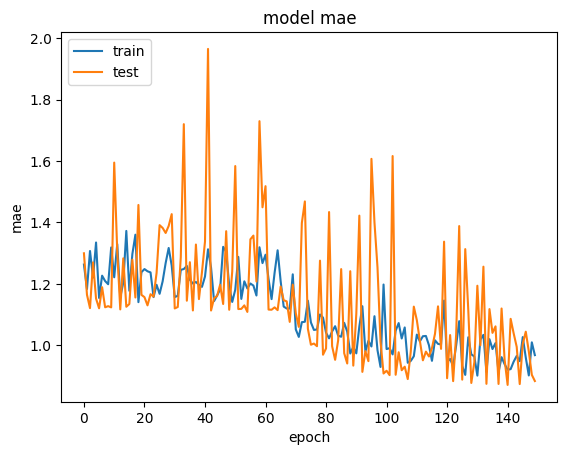

In [73]:
plt.plot(history.history["mae"])
plt.plot(history.history["val_mae"])
plt.title("model mae")
plt.ylabel("mae")
plt.xlabel("epoch")
plt.legend(["train","test"],loc = "upper left")
plt.show()


In [74]:
model2 = Sequential()
model2.add(Dense(12, input_dim=10, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model2.fit(x, y, epochs=15,validation_split=0.33, batch_size=10)
scores = model2.evaluate(x, y)
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

Epoch 1/15
1008/1008 [==============================] - 2s 2ms/step - loss: -3384654.2500 - accuracy: 1.9849e-04 - val_loss: -11823293.0000 - val_accuracy: 4.0298e-04
Epoch 2/15
1008/1008 [==============================] - 1s 1ms/step - loss: -43782456.0000 - accuracy: 1.9849e-04 - val_loss: -78879232.0000 - val_accuracy: 4.0298e-04
Epoch 3/15
1008/1008 [==============================] - 2s 2ms/step - loss: -161151664.0000 - accuracy: 1.9849e-04 - val_loss: -225280448.0000 - val_accuracy: 4.0298e-04
Epoch 4/15
1008/1008 [==============================] - 2s 2ms/step - loss: -373409632.0000 - accuracy: 1.9849e-04 - val_loss: -462623840.0000 - val_accuracy: 4.0298e-04
Epoch 5/15
1008/1008 [==============================] - 2s 2ms/step - loss: -692384448.0000 - accuracy: 1.9849e-04 - val_loss: -800791744.0000 - val_accuracy: 4.0298e-04
Epoch 6/15
1008/1008 [==============================] - 2s 2ms/step - loss: -1130412544.0000 - accuracy: 1.9849e-04 - val_loss: -1251488256.0000 - val_accu

In [75]:
model3= Sequential()
model3.add(Dense(12, input_dim=10, activation='tanh'))
model3.add(Dense(8, activation='tanh'))
model3.add(Dense(1, activation='relu'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model3.fit(x, y, epochs=15,validation_split=0.33, batch_size=10)
scores = model3.evaluate(x, y)
print("%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))

Epoch 1/15
1008/1008 [==============================] - 2s 2ms/step - loss: 535.8178 - accuracy: 0.0000e+00 - val_loss: 483.9389 - val_accuracy: 0.0010
Epoch 2/15
1008/1008 [==============================] - 2s 2ms/step - loss: 535.8180 - accuracy: 0.0000e+00 - val_loss: 483.9389 - val_accuracy: 0.0010
Epoch 3/15
1008/1008 [==============================] - 2s 2ms/step - loss: 535.8184 - accuracy: 0.0000e+00 - val_loss: 483.9389 - val_accuracy: 0.0010
Epoch 4/15
1008/1008 [==============================] - 2s 2ms/step - loss: 535.8184 - accuracy: 0.0000e+00 - val_loss: 483.9389 - val_accuracy: 0.0010
Epoch 5/15
1008/1008 [==============================] - 2s 2ms/step - loss: 535.8184 - accuracy: 0.0000e+00 - val_loss: 483.9389 - val_accuracy: 0.0010
Epoch 6/15
1008/1008 [==============================] - 1s 1ms/step - loss: 535.8178 - accuracy: 0.0000e+00 - val_loss: 483.9389 - val_accuracy: 0.0010
Epoch 7/15
1008/1008 [==============================] - 2s 2ms/step - loss: 535.8185 - a

In [76]:
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()
column_names=dataset.columns
data=pd.DataFrame(standard_scaler.fit_transform(dataset),columns=column_names)
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.486041,-0.895629,1.258295,-0.889425,-1.379101,-1.472437,0.644785,-1.237495,-1.37027,0.680649,1.365284
1,-1.486041,-0.739801,1.330742,-0.889425,-1.363528,-1.472437,0.644785,-1.237495,-1.37027,0.680649,1.365284
2,-1.486041,-0.739801,1.185847,-0.889425,-1.351309,-1.472437,0.518043,-1.237495,-1.37027,0.680649,1.365284
3,-1.354097,-0.583972,1.185847,-0.889425,-1.348194,-1.472437,0.518043,-1.237495,-1.37027,0.680649,1.365284
4,-1.354097,-0.583972,1.185847,-0.889425,-1.354663,-1.472437,0.518043,-1.237495,-1.37027,0.680649,1.365284
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.090208,-1.207287,1.403189,-0.889425,-1.498657,-2.076786,0.137816,-1.426645,-1.37027,1.127687,1.078930
15035,-1.354097,-1.207287,1.475637,-0.889425,-1.438759,-2.258090,-0.242411,-1.426645,-1.37027,1.127687,1.078930
15036,-1.354097,-1.051458,1.475637,-0.889425,-1.410967,-2.802004,-1.002865,-1.489695,-1.37027,2.468801,2.128893
15037,-1.354097,-1.051458,1.475637,-0.889425,-1.447624,-2.439395,-0.495895,-1.489695,-1.37027,2.021763,2.415247


In [77]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [78]:
X=data.drop(columns='TEY')
Y=data['TEY']

In [79]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.486041,-0.895629,1.258295,-0.889425,-1.379101,-1.472437,0.644785,-1.37027,0.680649,1.365284
1,-1.486041,-0.739801,1.330742,-0.889425,-1.363528,-1.472437,0.644785,-1.37027,0.680649,1.365284
2,-1.486041,-0.739801,1.185847,-0.889425,-1.351309,-1.472437,0.518043,-1.37027,0.680649,1.365284
3,-1.354097,-0.583972,1.185847,-0.889425,-1.348194,-1.472437,0.518043,-1.37027,0.680649,1.365284
4,-1.354097,-0.583972,1.185847,-0.889425,-1.354663,-1.472437,0.518043,-1.37027,0.680649,1.365284
...,...,...,...,...,...,...,...,...,...,...
15034,-1.090208,-1.207287,1.403189,-0.889425,-1.498657,-2.076786,0.137816,-1.37027,1.127687,1.078930
15035,-1.354097,-1.207287,1.475637,-0.889425,-1.438759,-2.258090,-0.242411,-1.37027,1.127687,1.078930
15036,-1.354097,-1.051458,1.475637,-0.889425,-1.410967,-2.802004,-1.002865,-1.37027,2.468801,2.128893
15037,-1.354097,-1.051458,1.475637,-0.889425,-1.447624,-2.439395,-0.495895,-1.37027,2.021763,2.415247


In [80]:
Y

0       -1.237495
1       -1.237495
2       -1.237495
3       -1.237495
4       -1.237495
           ...   
15034   -1.426645
15035   -1.426645
15036   -1.489695
15037   -1.489695
15038   -1.426645
Name: TEY, Length: 15039, dtype: float64

In [81]:
model4 = Sequential()
model4.add(Dense(12, input_dim=10, activation='relu'))
model4.add(Dense(8, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model4.fit(X, Y, epochs=15,validation_split=0.33, batch_size=10)
scores = model4.evaluate(X, Y)
print("%s: %.2f%%" % (model4.metrics_names[1], scores[1]*100))

Epoch 1/15
1008/1008 [==============================] - 2s 2ms/step - loss: -57.7127 - accuracy: 0.0000e+00 - val_loss: -252.2313 - val_accuracy: 0.0000e+00
Epoch 2/15
1008/1008 [==============================] - 2s 2ms/step - loss: -784.4092 - accuracy: 0.0000e+00 - val_loss: -1718.6758 - val_accuracy: 0.0000e+00
Epoch 3/15
1008/1008 [==============================] - 2s 2ms/step - loss: -2917.7786 - accuracy: 0.0000e+00 - val_loss: -4930.5884 - val_accuracy: 0.0000e+00
Epoch 4/15
1008/1008 [==============================] - 1s 1ms/step - loss: -6816.3628 - accuracy: 0.0000e+00 - val_loss: -10203.8281 - val_accuracy: 0.0000e+00
Epoch 5/15
1008/1008 [==============================] - 1s 1ms/step - loss: -12635.4619 - accuracy: 0.0000e+00 - val_loss: -17670.8516 - val_accuracy: 0.0000e+00
Epoch 6/15
1008/1008 [==============================] - 1s 1ms/step - loss: -20572.8477 - accuracy: 0.0000e+00 - val_loss: -27597.0078 - val_accuracy: 0.0000e+00
Epoch 7/15
1008/1008 [=================

In [82]:
!pip install keras

In [83]:
!pip install tensorflow

In [84]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [85]:
import keras
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
from sklearn.model_selection import cross_val_score
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.20 (0.21) MSE


In [86]:
estimator.fit(x, y)
prediction = estimator.predict(X)
prediction

array([ 0.274729  ,  0.3186111 ,  0.2593199 , ..., -0.08864103,
       -0.12190761,  0.02507018], dtype=float32)

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [88]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)

In [89]:
prediction

array([1.4721098, 1.4494953, 0.7969022, ..., 0.7089244, 1.4333627,
       0.4409594], dtype=float32)